## Data Loading and Preprocessing Notebook

### Data and approach explanation

#### Dataset Source:
The dataset utilized for this project is the **Consumer Financial Complaints** dataset, available on Hugging Face under the repository `BEE-spoke-data/consumer-finance-complaints`. This dataset contains customer complaints filed with the Consumer Financial Protection Bureau (CFPB) regarding various financial products.

#### Data Filtering:
To streamline the model fine-tuning process within computational constraints, the dataset was filtered to focus on specific criteria:
- **Company**: Only complaints related to **Bank of America, National Association** were selected.
- **Product**: Complaints were filtered to include two specific financial product categories:
  - Credit Card or Prepaid Card
  - Mortgage
- **Complaint Availability**: Rows where the "Consumer Complaint Narrative" is **not null** were retained.

After applying these filters, the dataset was balanced by sampling:
- 1,000 complaints for the **Credit Card or Prepaid Card** product category.
- 1,000 complaints for the **Mortgage** product category.

This resulted in a total of **2,000 samples**, representing an equal number of complaints from each category.
This balance ensures that the dataset is suitable for binary classification tasks without introducing class imbalance issues.

#### Dataset Features:
The following two fields were retained from the original dataset:
1. **Consumer Complaint Narrative**: The textual complaint details provided by consumers.
2. **Product**: The target label representing the financial product category (either **Credit card or prepaid card** or **Mortgage**).

All additional columns not relevant to the model training were removed.

#### Last notes:
The filtered dataset was exported to a CSV file named `filtered_dataset.csv`, stored in the `data` folder.


#### Imports

In [1]:
from datasets import load_dataset, ClassLabel, concatenate_datasets
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

#### Data Loading

In [2]:
# Load the dataset from hugging face
# See: https://huggingface.co/datasets/BEE-spoke-data/consumer-finance-complaints

# The consumer-finance-complaints dataset only has a train split
dataset = load_dataset("BEE-spoke-data/consumer-finance-complaints",split="train")

#### Data Filtering

Due to computational constraints (local gpu+cpu) I decided to extract 2000 consumer complaint narratives from Bank of America, National Association.
In addition, two target classes (financial products) decided to be extracted from the whole dataset: **Credit card or prepaid card** and **Mortgage**.
In other words, the newly filtered dataset consists of 2000 instances, 1000 complaints about credit/prepaid cards and 1000 complaints about Mortgages.

In [3]:
# Filter rows based on multiple column values
filtered_dataset = dataset.filter(
    lambda row: row["Company"] == "BANK OF AMERICA, NATIONAL ASSOCIATION"
    and row["Product"] in ["Credit card or prepaid card", "Mortgage"]
    and row["Consumer complaint narrative"] is not None
)

# Separate the two classes
mortgage_dataset = filtered_dataset.filter(
	lambda row: row["Product"] == "Mortgage"
)
credit_card_dataset = filtered_dataset.filter(
	lambda row: row["Product"] == "Credit card or prepaid card"
)

# Sample 1000 rows from each class (seed 42 to produce the same results)
mortgage_sample = mortgage_dataset.shuffle(seed = 42).select(range(1000))
credit_card_sample = credit_card_dataset.shuffle(seed = 42).select(range(1000))

# Combine the two samples
balanced_dataset = concatenate_datasets([mortgage_sample, credit_card_sample])

#### Removing additional columns that may exist in dataset.

In [4]:
# keeping only ["Consumer complaint narrative", "Product"] features.
filtered_columns_dataset = balanced_dataset.remove_columns(
    [col for col in filtered_dataset.column_names
     if col not in ["Consumer complaint narrative", "Product"]]
)

filtered_columns_dataset

Dataset({
    features: ['Product', 'Consumer complaint narrative'],
    num_rows: 2000
})

#### Convert dataset to a pandas Dataframe.

In [5]:
# Convert the dataset to a pandas DataFrame
df = filtered_columns_dataset.to_pandas()

#### Plotting the results

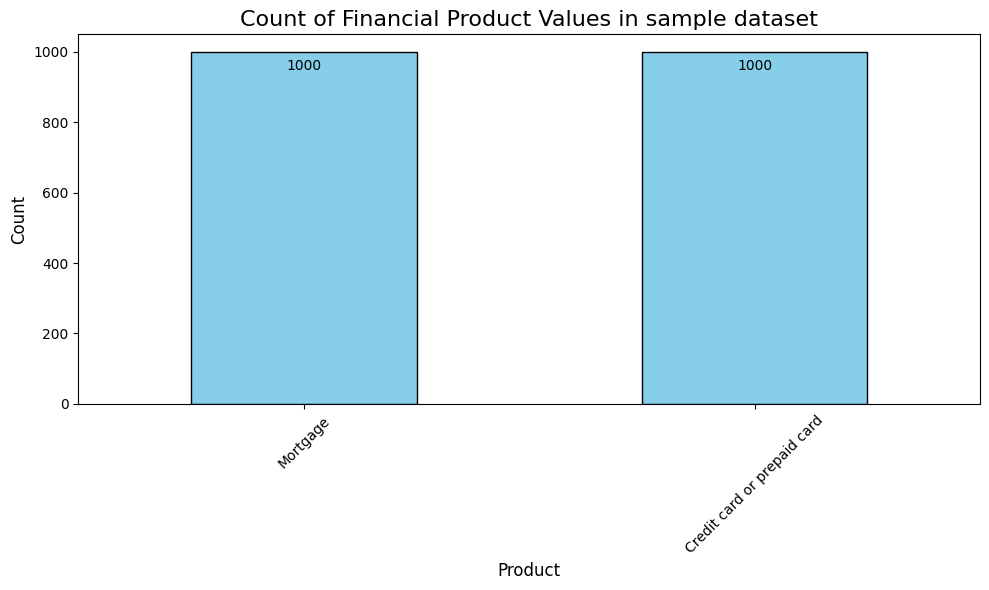

In [9]:
# Counting occurrences of each Product value
product_counts = df["Product"].value_counts()

# Plotting the counts as a bar chart
plt.figure(figsize = (10, 6))
bars = product_counts.plot(kind = "bar", color = "skyblue", edgecolor = "black")

# Annotating each bar with the corresponding count
for index, value in enumerate(product_counts):
	plt.text(index, value - (value * 0.05),  # Position slightly below the top
	         str(value), color = "black", ha = "center", fontsize = 10
	         )

# Add labels and title
plt.title("Count of Financial Product Values in sample dataset", fontsize = 16)
plt.xlabel("Product", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation = 45)
plt.tight_layout()

# Show the plot
plt.show()



#### Output the dataset that will be used for fine-tuning as a csv file for later use

In [10]:
# Define the data folder and CSV file path
data_folder = Path("data")

# Use pathlib to define a file path
output_path = data_folder / "filtered_dataset.csv"

# Export the DataFrame to CSV
df.to_csv(output_path, index=False)

print(f"Filtered dataset successfully saved to {output_path}")

Filtered dataset successfully saved to data\filtered_dataset.csv
